<a href="https://colab.research.google.com/github/plaban1981/Prompty_Engineering/blob/main/Prompt_Engineering_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.5 MB/s eta 0:00:00


In [2]:
import os
import openai
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass()
#
openai.api_key = os.getenv('OPENAI_API_KEY')

··········


## Helper Function

In [3]:
def get_completion(prompt, model="gpt-3.5-turbo"): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]


##Summarizing

In [8]:
prod_review = """
Got this panda plush toy for my daughter's birthday, \
who loves it and takes it everywhere. It's soft and \ 
super cute, and its face has a friendly look. It's \ 
a bit small for what I paid though. I think there \ 
might be other options that are bigger for the \ 
same price. It arrived a day earlier than expected, \ 
so I got to play with it myself before I gave it \ 
to her.
"""

## Summarize with a word/sentence/character limit

In [11]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


Soft and cute panda plush toy loved by daughter, but a bit small for the price. Arrived early.


## Summarize with a focus on shipping and delivery

In [12]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
Shipping deparmtment. 

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that mention shipping and delivery of the product. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


The panda plush toy arrived a day earlier than expected, but the customer felt it was a bit small for the price paid.


## Summarize with a focus on price and value

In [13]:
prompt = f"""
Your task is to generate a short summary of a product \
review from an ecommerce site to give feedback to the \
pricing deparmtment, responsible for determining the \
price of the product.  

Summarize the review below, delimited by triple 
backticks, in at most 30 words, and focusing on any aspects \
that are relevant to the price and perceived value. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)


The panda plush toy is soft, cute, and loved by the recipient, but the price may be too high for its size.


#### Comment¶
Summaries include topics that are not related to the topic of focus.

## Try "extract" instead of "summarize"

In [14]:
prompt = f"""
Your task is to extract relevant information from \ 
a product review from an ecommerce site to give \
feedback to the Shipping department. 

From the review below, delimited by triple quotes \
extract the information relevant to shipping and \ 
delivery. Limit to 30 words. 

Review: ```{prod_review}```
"""

response = get_completion(prompt)
print(response)

The product arrived a day earlier than expected.


## Summarize multiple product reviews

In [15]:

review_1 = prod_review 

# review for a standing lamp
review_2 = """
Needed a nice lamp for my bedroom, and this one \
had additional storage and not too high of a price \
point. Got it fast - arrived in 2 days. The string \
to the lamp broke during the transit and the company \
happily sent over a new one. Came within a few days \
as well. It was easy to put together. Then I had a \
missing part, so I contacted their support and they \
very quickly got me the missing piece! Seems to me \
to be a great company that cares about their customers \
and products. 
"""

# review for an electric toothbrush
review_3 = """
My dental hygienist recommended an electric toothbrush, \
which is why I got this. The battery life seems to be \
pretty impressive so far. After initial charging and \
leaving the charger plugged in for the first week to \
condition the battery, I've unplugged the charger and \
been using it for twice daily brushing for the last \
3 weeks all on the same charge. But the toothbrush head \
is too small. I’ve seen baby toothbrushes bigger than \
this one. I wish the head was bigger with different \
length bristles to get between teeth better because \
this one doesn’t.  Overall if you can get this one \
around the $50 mark, it's a good deal. The manufactuer's \
replacements heads are pretty expensive, but you can \
get generic ones that're more reasonably priced. This \
toothbrush makes me feel like I've been to the dentist \
every day. My teeth feel sparkly clean! 
"""

# review for a blender
review_4 = """
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

reviews = [review_1, review_2, review_3, review_4]



Summarizing multiple reviews stored as a list

In [16]:
for i in range(len(reviews)):
    prompt = f"""
    Your task is to generate a short summary of a product \ 
    review from an ecommerce site. 

    Summarize the review below, delimited by triple \
    backticks in at most 20 words. 

    Review: ```{reviews[i]}```
    """

    response = get_completion(prompt)
    print(i, response, "\n",len(response),"\n")


0 Soft and cute panda plush toy loved by daughter, but a bit small for the price. Arrived early. 
 94 

1 Affordable lamp with storage, fast shipping, and excellent customer service. Easy to assemble and missing parts were quickly replaced. 
 134 

2 Good battery life, small toothbrush head, but effective cleaning. Good deal if bought around $50. 
 97 

3 The product was on sale for $49 in November, but the price increased to $70-$89 in December. The base doesn't look as good as previous editions, but the reviewer plans to be gentle with it. A special tip for making smoothies is to freeze the fruits and vegetables beforehand. The motor made a funny noise after a year, and the warranty had expired. Overall quality has decreased. 
 379 



## INFERRING - prompt Engineering 4

# Inferring
- Infer sentiment and topics from product reviews and news articles.

#### Product Review Text

In [4]:
lamp_review = """
Needed a nice lamp for my bedroom, and this one had \
additional storage and not too high of a price point. \
Got it fast.  The string to our lamp broke during the \
transit and the company happily sent over a new one. \
Came within a few days as well. It was easy to put \
together.  I had a missing part, so I contacted their \
support and they very quickly got me the missing piece! \
Lumina seems to me to be a great company that cares \
about their customers and products!!
"""

## Sentiment (positive/negative)

In [5]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

The sentiment of the product review is positive.


In [6]:
prompt = f"""
What is the sentiment of the following product review, 
which is delimited with triple backticks?

Give your answer as a single word, either "positive" \
or "negative".

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

positive


## Identify types of emotions

In [7]:
prompt = f"""
Identify a list of emotions that the writer of the \
following review is expressing. Include no more than \
five items in the list. Format your answer as a list of \
lower-case words separated by commas.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

happy, satisfied, grateful, impressed, content


## Identify anger

In [8]:
prompt = f"""
Is the writer of the following review expressing anger?\
The review is delimited with triple backticks. \
Give your answer as either yes or no.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

No


## Extract product and company name from customer reviews

In [9]:
prompt = f"""
Identify the following items from the review text: 
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Item" and "Brand" as the keys. 
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
  
Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Item": "lamp",
  "Brand": "Lumina"
}


## Doing multiple tasks at once

In [10]:
prompt = f"""
Identify the following items from the review text: 
- Sentiment (positive or negative)
- Is the reviewer expressing anger? (true or false)
- Item purchased by reviewer
- Company that made the item

The review is delimited with triple backticks. \
Format your response as a JSON object with \
"Sentiment", "Anger", "Item" and "Brand" as the keys.
If the information isn't present, use "unknown" \
as the value.
Make your response as short as possible.
Format the Anger value as a boolean.

Review text: '''{lamp_review}'''
"""
response = get_completion(prompt)
print(response)

{
  "Sentiment": "positive",
  "Anger": false,
  "Item": "lamp with additional storage",
  "Brand": "Lumina"
}


## Inferring topics

In [11]:
story = """
In a recent survey conducted by the government, 
public sector employees were asked to rate their level 
of satisfaction with the department they work at. 
The results revealed that NASA was the most popular 
department with a satisfaction rating of 95%.

One NASA employee, John Smith, commented on the findings, 
stating, "I'm not surprised that NASA came out on top. 
It's a great place to work with amazing people and 
incredible opportunities. I'm proud to be a part of 
such an innovative organization."

The results were also welcomed by NASA's management team, 
with Director Tom Johnson stating, "We are thrilled to 
hear that our employees are satisfied with their work at NASA. 
We have a talented and dedicated team who work tirelessly 
to achieve our goals, and it's fantastic to see that their 
hard work is paying off."

The survey also revealed that the 
Social Security Administration had the lowest satisfaction 
rating, with only 45% of employees indicating they were 
satisfied with their job. The government has pledged to 
address the concerns raised by employees in the survey and 
work towards improving job satisfaction across all departments.
"""

## Infer 5 topics

In [12]:
prompt = f"""
Determine five topics that are being discussed in the \
following text, which is delimited by triple backticks.

Make each item one or two words long. 

Format your response as a list of items separated by commas.

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

government survey, job satisfaction, NASA, Social Security Administration, employee concerns


In [14]:
topic_list = response.split(sep=',')

In [15]:
topic_list

['government survey',
 ' job satisfaction',
 ' NASA',
 ' Social Security Administration',
 ' employee concerns']

## Make a news alert for certain topics

In [16]:
prompt = f"""
Determine whether each item in the following list of \
topics is a topic in the text below, which
is delimited with triple backticks.

Give your answer as list with 0 or 1 for each topic.\

List of topics: {", ".join(topic_list)}

Text sample: '''{story}'''
"""
response = get_completion(prompt)
print(response)

government survey: 1
job satisfaction: 1
NASA: 1
Social Security Administration: 1
employee concerns: 0


In [18]:
topic_dict = {i.split(': ')[0]: int(i.split(': ')[1]) for i in response.split(sep='\n')}
if topic_dict['NASA'] == 1:
    print("ALERT: New NASA story!")

ALERT: New NASA story!


## Translation

ChatGPT is trained with sources in many languages. This gives the model the ability to do translation. Here are some examples of how to use this capability.

In [19]:
prompt = f"""
Translate the following English text to Spanish: \ 
```Hi, I would like to order a blender```
"""
response = get_completion(prompt)
print(response)

Hola, me gustaría ordenar una licuadora.


In [20]:
prompt = f"""
Tell me which language this is: 
```Combien coûte le lampadaire?```
"""
response = get_completion(prompt)
print(response)

This is French.


In [21]:
prompt = f"""
Translate the following  text to French ,Spanish ,Hindi
and English pirate: \
```I want to order a basketball```
"""
response = get_completion(prompt)
print(response)

French: Je veux commander un ballon de basket
Spanish: Quiero ordenar una pelota de baloncesto
Hindi: मैं एक बास्केटबॉल आदेश देना चाहता हूँ। (Main ek basketball order dena chahta hoon)
English Pirate: Arrr, I be wantin' to order a basketball, matey!


In [22]:
prompt = f"""
Translate the following text to Spanish in both the \
formal and informal forms: 
'Would you like to order a pillow?'
"""
response = get_completion(prompt)
print(response)

Formal: ¿Le gustaría ordenar una almohada?
Informal: ¿Te gustaría ordenar una almohada?


### Universal Translator
Imagine you are in charge of IT at a large multinational e-commerce company. Users are messaging you with IT issues in all their native languages. Your staff is from all over the world and speaks only their native languages. You need a universal translator!

In [23]:
user_messages = [
  "La performance du système est plus lente que d'habitude.",  # System performance is slower than normal         
  "Mi monitor tiene píxeles que no se iluminan.",              # My monitor has pixels that are not lighting
  "Il mio mouse non funziona",                                 # My mouse is not working
  "Mój klawisz Ctrl jest zepsuty",                             # My keyboard has a broken control key
  "我的屏幕在闪烁"                                               # My screen is flashing
] 

In [25]:
for issue in user_messages:
    prompt = f"Tell me what language this is: ```{issue}```"
    lang = get_completion(prompt)
    print(f"Original message ({lang}): {issue}")

    prompt = f"""
    Translate the following  text to English \
    and Hindi: ```{issue}```
    """
    response = get_completion(prompt)
    print(response, "\n")

Original message (This is French.): La performance du système est plus lente que d'habitude.
English: The system performance is slower than usual.
Hindi: सिस्टम कार्यक्षमता आम तौर पर से धीमी है। 

Original message (This is Spanish.): Mi monitor tiene píxeles que no se iluminan.
English: My monitor has pixels that don't light up.
Hindi: मेरे मॉनिटर में पिक्सेल हैं जो जलने वाले नहीं हैं। 

Original message (This is Italian.): Il mio mouse non funziona
English: My mouse is not working
Hindi: मेरा माउस काम नहीं कर रहा है। 

Original message (This is Polish.): Mój klawisz Ctrl jest zepsuty
English: My Ctrl key is broken.
Hindi: मेरी Ctrl कुंजी टूट गई है। 

Original message (This is Chinese (Simplified).): 我的屏幕在闪烁
English: My screen is flickering.
Hindi: मेरी स्क्रीन फ्लिकरिंग हो रही है। 



## Tone Transformation
Writing can vary based on the intended audience. ChatGPT can produce different tones.

In [26]:
prompt = f"""
Translate the following from slang to a business letter: 
'Dude, This is Joe, check out this spec on this standing lamp.'
"""
response = get_completion(prompt)
print(response)

Dear Sir/Madam,

I am writing to bring to your attention a standing lamp that I believe may be of interest to you. Please find attached the specifications for your review.

Thank you for your time and consideration.

Sincerely,

Joe


## Format Conversion
ChatGPT can translate between formats. The prompt should describe the input and output formats.

In [27]:
data_json = { "resturant employees" :[ 
    {"name":"Shyam", "email":"shyamjaiswal@gmail.com"},
    {"name":"Bob", "email":"bob32@gmail.com"},
    {"name":"Jai", "email":"jai87@gmail.com"}
]}

prompt = f"""
Translate the following python dictionary from JSON to an HTML \
table with column headers and title: {data_json}
"""
response = get_completion(prompt)
print(response)

<table>
  <caption>Restaurant Employees</caption>
  <thead>
    <tr>
      <th>Name</th>
      <th>Email</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Shyam</td>
      <td>shyamjaiswal@gmail.com</td>
    </tr>
    <tr>
      <td>Bob</td>
      <td>bob32@gmail.com</td>
    </tr>
    <tr>
      <td>Jai</td>
      <td>jai87@gmail.com</td>
    </tr>
  </tbody>
</table>


In [28]:
from IPython.display import display, Markdown, Latex, HTML, JSON
display(HTML(response))

Name,Email
Shyam,shyamjaiswal@gmail.com
Bob,bob32@gmail.com
Jai,jai87@gmail.com


## Spellcheck/Grammar check.

Here are some examples of common grammar and spelling problems and the LLM's response. 

To signal to the LLM that you want it to proofread your text, you instruct the model to 'proofread' or 'proofread and correct'.

In [29]:
text = [ 
  "The girl with the black and white puppies have a ball.",  # The girl has a ball.
  "Yolanda has her notebook.", # ok
  "Its going to be a long day. Does the car need it’s oil changed?",  # Homonyms
  "Their goes my freedom. There going to bring they’re suitcases.",  # Homonyms
  "Your going to need you’re notebook.",  # Homonyms
  "That medicine effects my ability to sleep. Have you heard of the butterfly affect?", # Homonyms
  "This phrase is to cherck chatGPT for speling abilitty"  # spelling
]
for t in text:
    prompt = f"""Proofread and correct the following text
    and rewrite the corrected version. If you don't find
    and errors, just say "No errors found". Don't use 
    any punctuation around the text:
    ```{t}```"""
    response = get_completion(prompt)
    print(response)

The girl with the black and white puppies has a ball.
No errors found.
It's going to be a long day. Does the car need its oil changed?
Their goes my freedom. There going to bring they're suitcases.

Corrected version: 
There goes my freedom. They're going to bring their suitcases.
You're going to need your notebook.
That medicine affects my ability to sleep. Have you heard of the butterfly effect?
This phrase is to check ChatGPT for spelling ability.


In [30]:
text = f"""
Got this for my daughter for her birthday cuz she keeps taking \
mine from my room.  Yes, adults also like pandas too.  She takes \
it everywhere with her, and it's super soft and cute.  One of the \
ears is a bit lower than the other, and I don't think that was \
designed to be asymmetrical. It's a bit small for what I paid for it \
though. I think there might be other options that are bigger for \
the same price.  It arrived a day earlier than expected, so I got \
to play with it myself before I gave it to my daughter.
"""
prompt = f"proofread and correct this review: ```{text}```"
response = get_completion(prompt)
print(response)

I got this for my daughter's birthday because she keeps taking mine from my room. Yes, adults also like pandas too. She takes it everywhere with her, and it's super soft and cute. However, one of the ears is a bit lower than the other, and I don't think that was designed to be asymmetrical. Additionally, it's a bit small for what I paid for it. I think there might be other options that are bigger for the same price. On the positive side, it arrived a day earlier than expected, so I got to play with it myself before I gave it to my daughter.


##

In [32]:
!pip install redlines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from redlines import Redlines

diff = Redlines(text,response)
display(Markdown(diff.output_markdown))

<span style="color:red;font-weight:700;text-decoration:line-through;">Got this for </span><span style="color:red;font-weight:700;">Title: A Soft and Cute Panda Plush Toy for All Ages </span>

<span style="color:red;font-weight:700;">Introduction: </span>

<span style="color:red;font-weight:700;">As a parent, finding the perfect gift for your child's birthday can be a daunting task. However, I stumbled upon a soft and cute panda plush toy that not only made </span>my daughter <span style="color:red;font-weight:700;text-decoration:line-through;">for her birthday cuz she keeps taking mine from </span><span style="color:red;font-weight:700;">happy but also brought joy to me as an adult. In this review, I will share </span>my <span style="color:red;font-weight:700;text-decoration:line-through;">room.  Yes, adults also like pandas too.  She takes it everywhere </span><span style="color:red;font-weight:700;">experience </span>with <span style="color:red;font-weight:700;text-decoration:line-through;">her, and it's </span><span style="color:red;font-weight:700;">this product and provide an honest assessment of its features. </span>

<span style="color:red;font-weight:700;">Product Description: </span>

<span style="color:red;font-weight:700;">The panda plush toy is made of high-quality materials that make it </span>super soft and <span style="color:red;font-weight:700;text-decoration:line-through;">cute.  </span><span style="color:red;font-weight:700;">cuddly. Its cute design is perfect for children and adults alike, making it a versatile gift option. The toy is small enough to carry around, making it an ideal companion for your child on their adventures. </span>

<span style="color:red;font-weight:700;">Pros: </span>

<span style="color:red;font-weight:700;">The panda plush toy is incredibly soft and cute, making it an excellent gift for children and adults. Its small size makes it easy to carry around, and its design is perfect for snuggling. The toy arrived a day earlier than expected, which was a pleasant surprise. </span>

<span style="color:red;font-weight:700;">Cons: </span>

<span style="color:red;font-weight:700;"></span>One of the ears is a bit lower than the other, <span style="color:red;font-weight:700;text-decoration:line-through;">and I don't think that was designed to be </span><span style="color:red;font-weight:700;">which makes the toy </span>asymmetrical. <span style="color:red;font-weight:700;text-decoration:line-through;">It's </span><span style="color:red;font-weight:700;">Additionally, the toy is </span>a bit small for <span style="color:red;font-weight:700;text-decoration:line-through;">what I paid for it though. I think </span><span style="color:red;font-weight:700;">its price, and </span>there might be other options that are bigger for the same <span style="color:red;font-weight:700;text-decoration:line-through;">price.  It arrived a day earlier than expected, so </span><span style="color:red;font-weight:700;">price. </span>

<span style="color:red;font-weight:700;">Conclusion: </span>

<span style="color:red;font-weight:700;">Overall, the panda plush toy is an excellent gift option for children and adults who love cute and cuddly toys. Despite its small size and asymmetrical design, the toy's softness and cuteness make up for its shortcomings. </span>I <span style="color:red;font-weight:700;text-decoration:line-through;">got to play with it myself before I gave it to my daughter.</span><span style="color:red;font-weight:700;">highly recommend this product to anyone looking for a versatile and adorable gift option.</span>

In [34]:
prompt = f"""
proofread and correct this review. Make it more compelling. 
Ensure it follows APA style guide and targets an advanced reader. 
Output in markdown format.
Text: ```{text}```
"""
response = get_completion(prompt)
display(Markdown(response))

Title: A Soft and Cute Panda Plush Toy for All Ages

Introduction:
As a parent, finding the perfect gift for your child's birthday can be a daunting task. However, I stumbled upon a soft and cute panda plush toy that not only made my daughter happy but also brought joy to me as an adult. In this review, I will share my experience with this product and provide an honest assessment of its features.

Product Description:
The panda plush toy is made of high-quality materials that make it super soft and cuddly. Its cute design is perfect for children and adults alike, making it a versatile gift option. The toy is small enough to carry around, making it an ideal companion for your child on their adventures.

Pros:
The panda plush toy is incredibly soft and cute, making it an excellent gift for children and adults. Its small size makes it easy to carry around, and its design is perfect for snuggling. The toy arrived a day earlier than expected, which was a pleasant surprise.

Cons:
One of the ears is a bit lower than the other, which makes the toy asymmetrical. Additionally, the toy is a bit small for its price, and there might be other options that are bigger for the same price.

Conclusion:
Overall, the panda plush toy is an excellent gift option for children and adults who love cute and cuddly toys. Despite its small size and asymmetrical design, the toy's softness and cuteness make up for its shortcomings. I highly recommend this product to anyone looking for a versatile and adorable gift option.

# Expanding
In this lesson, you will generate customer service emails that are tailored to each customer's review.

## Setup

## Customize the automated reply to a customer email

In [36]:
# given the sentiment from the lesson on "inferring",
# and the original customer message, customize the email
sentiment = "negative"

# review for a blender
review = f"""
So, they still had the 17 piece system on seasonal \
sale for around $49 in the month of November, about \
half off, but for some reason (call it price gouging) \
around the second week of December the prices all went \
up to about anywhere from between $70-$89 for the same \
system. And the 11 piece system went up around $10 or \
so in price also from the earlier sale price of $29. \
So it looks okay, but if you look at the base, the part \
where the blade locks into place doesn’t look as good \
as in previous editions from a few years ago, but I \
plan to be very gentle with it (example, I crush \
very hard items like beans, ice, rice, etc. in the \ 
blender first then pulverize them in the serving size \
I want in the blender then switch to the whipping \
blade for a finer flour, and use the cross cutting blade \
first when making smoothies, then use the flat blade \
if I need them finer/less pulpy). Special tip when making \
smoothies, finely cut and freeze the fruits and \
vegetables (if using spinach-lightly stew soften the \ 
spinach then freeze until ready for use-and if making \
sorbet, use a small to medium sized food processor) \ 
that you plan to use that way you can avoid adding so \
much ice if at all-when making your smoothie. \
After about a year, the motor was making a funny noise. \
I called customer service but the warranty expired \
already, so I had to buy another one. FYI: The overall \
quality has gone done in these types of products, so \
they are kind of counting on brand recognition and \
consumer loyalty to maintain sales. Got it in about \
two days.
"""

In [38]:
def get_completion(prompt, model="gpt-3.5-turbo",temperature=0): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

In [37]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt)
print(response)

Dear Valued Customer,

Thank you for taking the time to leave a review about our product. We are sorry to hear that you experienced an increase in price and that the quality of the product did not meet your expectations. We apologize for any inconvenience this may have caused you.

We would like to assure you that we take all feedback seriously and we will be sure to pass your comments along to our team. If you have any further concerns, please do not hesitate to reach out to our customer service team for assistance.

Thank you again for your review and for choosing our product. We hope to have the opportunity to serve you better in the future.

Best regards,

AI customer agent


## Remind the model to use details from the customer's email

In [39]:
prompt = f"""
You are a customer service AI assistant.
Your task is to send an email reply to a valued customer.
Given the customer email delimited by ```, \
Generate a reply to thank the customer for their review.
If the sentiment is positive or neutral, thank them for \
their review.
If the sentiment is negative, apologize and suggest that \
they can reach out to customer service. 
Make sure to use specific details from the review.
Write in a concise and professional tone.
Sign the email as `AI customer agent`.
Customer review: ```{review}```
Review sentiment: {sentiment}
"""
response = get_completion(prompt, temperature=0.7)
print(response)

Dear Valued Customer,

Thank you for taking the time to share your thoughts about our 17 piece system. We are sorry to hear about the price increase and the issue with the blade lock. We apologize for any inconvenience that this may have caused you. We recommend reaching out to our customer service team for further assistance with the motor noise issue and to discuss any concerns you may have with the product.

We appreciate your support and your loyalty to our brand. We will take your feedback into consideration as we strive to improve our products and services. Thank you again for your review.

Best regards,

AI customer agent


## Chat Workflow

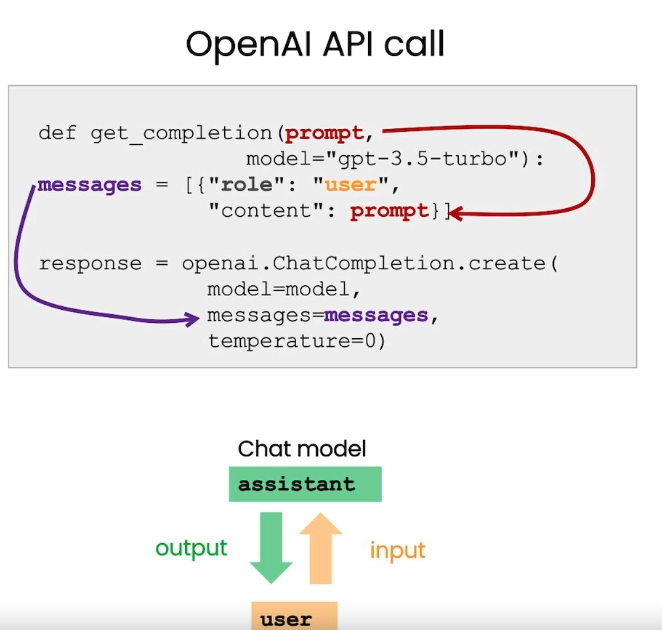

In [40]:
def get_completion(prompt, model="gpt-3.5-turbo"):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message["content"]

def get_completion_from_messages(messages, model="gpt-3.5-turbo", temperature=0):
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=temperature, # this is the degree of randomness of the model's output
    )
#     print(str(response.choices[0].message))
    return response.choices[0].message["content"]

In [41]:
messages =  [  
{'role':'system', 'content':'You are an assistant that speaks like Shakespeare.'},    
{'role':'user', 'content':'tell me a joke'},   
{'role':'assistant', 'content':'Why did the chicken cross the road'},   
{'role':'user', 'content':'I don\'t know'}  ]

In [42]:
response = get_completion_from_messages(messages, temperature=1)
print(response)

To get to the other side, my lord.


In [43]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Hi, my name is Isa'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Hi Isa! It's nice to meet you. How may I assist you today?


In [44]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},    
{'role':'user', 'content':'Yes,  can you remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

I'm sorry, but I don't have access to that information. Could you please tell me your name?


In [45]:
messages =  [  
{'role':'system', 'content':'You are friendly chatbot.'},
{'role':'user', 'content':'Hi, my name is Isa'},
{'role':'assistant', 'content': "Hi Isa! It's nice to meet you. \
Is there anything I can help you with today?"},
{'role':'user', 'content':'Yes, you can remind me, What is my name?'}  ]
response = get_completion_from_messages(messages, temperature=1)
print(response)

Your name is Isa.


# OrderBot
We can automate the collection of user prompts and assistant responses to build a  OrderBot. The OrderBot will take orders at a pizza restaurant. 

In [47]:
import panel as pn  # GUI
pn.extension()

In [48]:
def collect_messages(_):
    prompt = inp.value_input
    inp.value = ''
    context.append({'role':'user', 'content':f"{prompt}"})
    response = get_completion_from_messages(context) 
    context.append({'role':'assistant', 'content':f"{response}"})
    panels.append(
        pn.Row('User:', pn.pane.Markdown(prompt, width=600)))
    panels.append(
        pn.Row('Assistant:', pn.pane.Markdown(response, width=600, style={'background-color': '#F6F6F6'})))
 
    return pn.Column(*panels)


In [49]:

panels = [] # collect display 

context = [ {'role':'system', 'content':"""
You are OrderBot, an automated service to collect orders for a pizza restaurant. \
You first greet the customer, then collects the order, \
and then asks if it's a pickup or delivery. \
You wait to collect the entire order, then summarize it and check for a final \
time if the customer wants to add anything else. \
If it's a delivery, you ask for an address. \
Finally you collect the payment.\
Make sure to clarify all options, extras and sizes to uniquely \
identify the item from the menu.\
You respond in a short, very conversational friendly style. \
The menu includes \
pepperoni pizza  12.95, 10.00, 7.00 \
cheese pizza   10.95, 9.25, 6.50 \
eggplant pizza   11.95, 9.75, 6.75 \
fries 4.50, 3.50 \
greek salad 7.25 \
Toppings: \
extra cheese 2.00, \
mushrooms 1.50 \
sausage 3.00 \
canadian bacon 3.50 \
AI sauce 1.50 \
peppers 1.00 \
Drinks: \
coke 3.00, 2.00, 1.00 \
sprite 3.00, 2.00, 1.00 \
bottled water 5.00 \
"""} ]  # accumulate messages


inp = pn.widgets.TextInput(value="Hi", placeholder='Enter text here…')
button_conversation = pn.widgets.Button(name="Chat!")

interactive_conversation = pn.bind(collect_messages, button_conversation)

dashboard = pn.Column(
    inp,
    pn.Row(button_conversation),
    pn.panel(interactive_conversation, loading_indicator=True, height=300),
)

dashboard

Traceback (most recent call last):
 File "/usr/local/lib/python3.10/dist-packages/pyviz_comms/__init__.py", line 346, in _handle_msg
 self._on_msg(msg)
 File "/usr/local/lib/python3.10/dist-packages/panel/viewable.py", line 297, in _on_msg
 patch.apply_to_document(doc, comm.id if comm else None)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/protocol/messages/patch_doc.py", line 115, in apply_to_document
 invoke_with_curdoc(doc, lambda: doc.apply_json_patch(self.content, setter))
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/protocol/messages/patch_doc.py", line 115, in <lambda>
 invoke_with_curdoc(doc, lambda: doc.apply_json_patch(self.content, setter))
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/document.py", line 391, in apply_json_patch
 DocumentPatchedEvent.handle_json(self, event_json, references, setter)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/events.py", line 259, in handle_json
 handler(doc, event_json, references, setter)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/events.py", line 300, in _handle_json
 cb(event_json["msg_data"])
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 355, in trigger_json_event
 model._trigger_event(event)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/util/callback_manager.py", line 119, in _trigger_event
 self.document.callbacks.notify_event(cast(Model, self), event, invoke)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 247, in notify_event
 invoke_with_curdoc(doc, callback_invoker)
 File "/usr/local/lib/python3.10/dist-packages/bokeh/document/callbacks.py", line 408, in invoke_with_curdoc
 return f()
 File "/usr/local/lib/python3.10/dist-packages/bokeh/util/callback_manager.py", line 115, in invoke
 cast(EventCallbackWithEvent, callback)(event)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 413, in _comm_event
 state._handle_exception(e)
 File "/usr/local/lib/python3.10/dist-packages/panel/io/state.py", line 408, in _handle_exception
 raise exception
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 411, in _comm_event
 self._process_bokeh_event(doc, event)
 File "/usr/local/lib/python3.10/dist-packages/panel/reactive.py", line 348, in _process_bokeh_event
 self._process_event(event)
 File "/usr/local/lib/python3.10/dist-packages/panel/widgets/button.py", line 183, in _process_event
 self.param.trigger('value')
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 1993, in trigger
 self_.set_param(**dict(params, **triggers))
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 1929, in set_param
 return self_.update(kwargs)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 1902, in update
 self_._batch_call_watchers()
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2063, in _batch_call_watchers
 self_._execute_watcher(watcher, events)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 2025, in _execute_watcher
 watcher.fn(*args, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/panel/param.py", line 838, in _replace_pane
 new_object = self.eval(self.object)
 File "/usr/local/lib/python3.10/dist-packages/panel/param.py", line 818, in eval
 return function(*args, **kwargs)
 File "/usr/local/lib/python3.10/dist-packages/param/parameterized.py", line 407, in _depends
 return func(*args, **kw)
 File "/usr/local/lib/python3.10/dist-packages/panel/depends.py", line 209, in wrapped
 return function(*combined_args, **combined_kwargs)
 File "<ipython-input-48-b4f53b7475c5>", line 5, in collect_messages
 response = get_completion_from_messages(context)
 File "<ipython-input-40-6e2e2a359290>", line 11, in get_completion_from_messages
 response = openai.ChatC

Column
    [0] TextInput(placeholder='Enter text here…')
    [1] Row
        [0] Button(name='Chat!')
    [2] ParamFunction(function, _pane=Column, height=300, loading_indicator=True)

In [50]:
messages =  context.copy()
messages.append(
{'role':'system', 'content':'create a json summary of the previous food order. Itemize the price for each item\
 The fields should be 1) pizza, include size 2) list of toppings 3) list of drinks, include size   4) list of sides include size  5)total price '},    
)
 #The fields should be 1) pizza, price 2) list of toppings 3) list of drinks, include size include price  4) list of sides include size include price, 5)total price '},    

response = get_completion_from_messages(messages, temperature=0)
print(response)

Sure, here's a JSON summary of your order:

```
{
  "pizza": {
    "type": "pepperoni",
    "size": "large",
    "price": 12.95
  },
  "toppings": [
    {
      "type": "extra cheese",
      "price": 2.00
    },
    {
      "type": "mushrooms",
      "price": 1.50
    }
  ],
  "drinks": [
    {
      "type": "coke",
      "size": "medium",
      "price": 2.00
    }
  ],
  "sides": [
    {
      "type": "fries",
      "size": "small",
      "price": 3.50
    }
  ],
  "total_price": 21.95
}
``` 

Please note that I assumed the size of the pizza and drinks based on the prices you provided. If you'd like to change any of the items or sizes, just let me know!
